# A Basic Example for obtaining the lattice constants of a crystal system using LatticeFinder

[Back To Table of Contents](../../LatticeFinder_Jupyter_Example.ipynb)

In this example, we will be obtaining the lattice constant of a Au face centred cubic (FCC) crystal structure using the RGL potential, with RGL parameters from Baletto *et al.* [DOI: 10.1063/1.1448484](https://doi.org/10.1063/1.1448484). We will go through all the components of the *Run_LatticeFinder.py* files required to run LatticeFinder on Au, step by step. See [latticefinder.readthedocs.io/en/latest/How_To_Run_LatticeFinder](https://latticefinder.readthedocs.io/en/latest/How_To_Run_LatticeFinder.html) for more information on the *Run_LatticeFinder.py* file.

To run this notebook step by step, press the $\blacktriangleright$ button sequentially on the python code you want to run. You can find the $\blacktriangleright$ button in the menu bar above. Make sure you have run $\blacktriangleright$ on every cell before running the ``from LatticeFinder import LatticeFinder_Program`` execution cell. Equivalently, press the $\blacktriangleright\blacktriangleright$ button to completely run this *Run_LatticeFinder.py* file from beginning to end. You can also find the $\blacktriangleright\blacktriangleright$ button in the menu bar above. Jupyter will display a box that will ask you if you want to restart the kernal. Press the <img src="../../Images/Restart_button.svg" alt="Restart_Button" width="50"/> button to run the full Jupyter notebook in Python. 

Note: These are the vanilla settings for running LatticeFinder on Au, but feel free to change the settings as you wish.

Also note: This program makes files which are created and stored on the Binder server. If you want to rerun this example from scratch, you will need to remove these files. The following block code will do this. This is only needed for this notebook and is not apart of *Run_LatticeFinder.py* script.

In [1]:
import os
from shutil import rmtree
to_be_removed_before_restarting_Jupyter_example = [file for file in os.listdir('.') if not (file.endswith('.ipynb') or file.startswith('VASP_Files'))]
for example_file_or_folder in to_be_removed_before_restarting_Jupyter_example:
    if os.path.exists(example_file_or_folder):
        if os.path.isdir(example_file_or_folder):
            rmtree(example_file_or_folder)
        else:
            os.remove(example_file_or_folder)

The *Run_LatticeFinder.py* code begins below:

## Importing LatticeFinder into script

To begin, we need to import LatticeFinder into this *Run_LatticeFinder.py* script. Specifically, we want to import the ``LatticeFinder_Program`` into this *Run_LatticeFinder.py* script. We do this below:

In [2]:
from LatticeFinder import LatticeFinder_Program

[Back To Table of Contents](../../LatticeFinder_Jupyter_Example.ipynb)

##  Input information requried by LatticeFinder

The following information is required by LatticeFinder, and example of these parameters in *Run_LatticeFinder.py* is given below:

* **symbol** (*str.*): This is the element that makes up your 2D/3D system.
* **lattice_type** (*str.*): This is the type of lattice that you which to obtain the optimal lattice constants for. See Available crystal lattices in ASE for more information.

In [3]:
symbol = 'Au'
lattice_type = 'FaceCenteredCubic'

* **lattice_constant_parameters** (*list of floats*): These are the values of the lattice constant(s) that you would like to examine. There are two ways that this can be entered into LatticeFinder:
    * If you are locating the optimal lattice constant for a system that only contains one lattice constant, this can be entered in as a np.arange. For example, if you want to scan between a lattice constant of 3.0 Å to 5.0 Å in 0.1 Å segments, lattice_constant_parameters = np.arange(3.0,5.01,0.1). You can also have an irregular list. For example, if you want to look further*Run_LatticeFinder.py* between 3.8 Å and 4.5 Å in 0.01 segments, you can set lattice_constant_parameters = list(np.arange(3.0,3.8,0.1))+list(np.arange(3.8,4.5,0.01))+list(np.arange(4.5,5.01,0.1))
    * If you are locating the optimal lattice constanta for a system that only contains two lattice constants, this must be entered as a list, where each key is the name of the lattice constant. For example, for a hexagonal closed packed crystal, you can set lattice_constant_parameters = {'a': np.arange(2.0,5.01,0.1), 'c': np.arange(3.0,6.01,0.1)}. The lists for each lattice constant must be regularly spaced; you can not use irregular spacing in LatticeFinder for system with more than one lattice constant.

Some examples of the ``lattice_constant_parameters`` variable are given below. Try some of them out to get different results by uncommenting.

In [4]:
lattice_constant_parameters = (3.0,5.0,0.1) # Broad overview
#lattice_constant_parameters = list(np.arange(3.0,3.8,0.1))+list(np.arange(3.8,4.5,0.001))+list(np.arange(4.5,5.01,0.1)) # Broad overview with detail look at the low energy region of the potential energy surface.
#lattice_constant_parameters = (3.6,4.6,0.001) # Detailed look at potential energy surface of this Au FCC crystal

* **calculator** (*ase.calculator/str.*): The calculator is used to calculate the energy of the 2D/3D system at various lattice constants. See Calculators in ASE for information about how calculators works in ASE.
    * You can also use VASP to perform DFT local optimisations on your clusters. Do this by setting calculator = 'VASP'. See How to perform LatticeFinder with VASP calculations to learn more about how to perform VASP calculations on clusters created using NISP.
    * You can also elect to manually enter in the energies of the clusters. To do this, enter in calculator = 'Manual Mode'. See How to manually enter energy results into LatticeFinder for more information about how to manually enter in energies for clusters into LatticeFinder.

In [5]:
from asap3.Internal.BuiltinPotentials import Gupta
# Parameter sequence: [p, q, a, xi, r0]
r0 = 4.07/(2.0 ** 0.5)
Au_parameters = {'Au': [10.53, 4.30, 0.2197, 1.855, r0]} # Baletto
cutoff = 8
calculator = Gupta(Au_parameters, cutoff=cutoff, debug=False)

* **size** (*list of ints*): This is the size of the system within a cell. See Usage in Lattices for more infotmation about the size parameter.
* **directions** (*list of ints*): Still figuring this out. See Usage in Lattices for more infotmation about the directions parameter.
* **miller** (*list of ints*): Still figuring this out. See Usage in Lattices for more infotmation about the miller parameter.
* **no_of_cpus** (*int*): This is the number of cpus that you would like to use to perform calculations of 2D/3D system of various lattice constants.

In [6]:
size=(16,16,16)

directions=[]
miller=[]

limits = None

no_of_cpus = 2

[Back To Table of Contents](../../LatticeFinder_Jupyter_Example.ipynb)

## Run LatticeFinder!

You have got to the end of all the parameter setting stuff. Now on to running LatticeFinder. The next part of the ``Run_LatticeFinder.py`` script tells LatticeFinder to run. This is written as follows in the ``Run_LatticeFinder.py``. This may take a bit of time to run. 

In [7]:
LatticeFinder_Program(symbol, lattice_type, lattice_constant_parameters, calculator, size=size, directions=directions, miller=miller, limits=limits, no_of_cpus=no_of_cpus)


            This is the LATTICEFINDER Program            
            Version: 1.1.2.4

Input settings:

symbol: Au
lattice_type: FaceCenteredCubic
lattice_constant_parameters: [3.0, 5.0, 0.1]
calculator: <asap.RGL object at 0x0x2dca1f0>
size: (16, 16, 16)
directions: []
miller: []
Output settings:

limits
Other settings:

no_of_cpus: 2
Getting data
3.0
Performing calculations upon Lattices
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0
Finished performing calculations upon Lattices
Performing last finishing off pieces of work
Finished performing last finishing off pieces of work
Finished getting data


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 432x288 with 0 Axes>

[Back To Table of Contents](../../LatticeFinder_Jupyter_Example.ipynb)

## Post-processing data

Once LatticeFinder is finished, it prints out a bunch of files. These include:

* png files that shows the energy of the Au crystal structure across various lattice constants, and the optimal lattice constant for the Au FCC crystal structure. 
* ``lattice_data.txt`` that includes the energies of the FCC crystal for the various lattice constant values
* ``results_file.txt`` that shows some of the various results from performing the LatticeFinder program, such as the cohesive energy. 

See the file explorer on the right of this jupyter lab webpage to take a look at them. 

Below is an example of the energy vs lattice constants plots for the Au FCC crystal structure. 

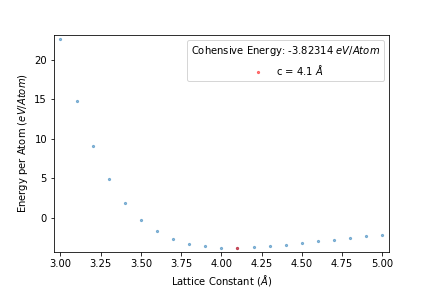

In [8]:
from IPython.display import Image
Image(filename='Energy_Vs_Lattice_Constant.png') 

[Back To Table of Contents](../../LatticeFinder_Jupyter_Example.ipynb)